In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import files

#file_path = 'https://drive.google.com/file/d/1ZVN3IcY8hlWsd3WVX45KTwqZhppyb1cI/view?usp=drive_link'

files.upload()  # Choose File "spambase.data"
# specify the path and file name:
file = 'spambase.data'

Saving spambase.data to spambase.data


In [ ]:
import matplotlib.pyplot as plt # Plotting figures

# Extract numpy representations of the features and labels given rows consisting of:
#   feat_0, feat_1, ..., feat_m, label
def load_data(filename, splitRatio):  # filename is 'spambase.data', splitRatio is 0.3 for example (30% for testing)

  dataset = np.loadtxt(filename, dtype='float32', delimiter=',')
  # Arrays to hold the labels and feature vectors.
  labels= dataset[:, -1]  # last column is the labels. In LR, labels are 1 or 0

  features = dataset[:, 0:-1] # get columns 0, 1, ..., up to the last column (do not include the last column)

  feature_std = StandardScaler().fit_transform(features) #  sklearn lib for data normalization

   # split dataset into training set and testing set
  x_train, x_test, y_train, y_test = train_test_split(feature_std, labels, test_size= splitRatio, random_state = 0)

  # Return a pair of the feature matrix and the one-hot label matrix.
  return x_train, x_test, y_train, y_test

In [ ]:
# start to training the model:
testRatio = 0.8
train_data, test_data, train_labels, test_labels = load_data(file, testRatio)

train_size, num_features = train_data.shape
test_size, test_features = test_data.shape

print("Training Size:",train_size)  # print for debugging
print("Features:",num_features)
print("trainY at 0:", train_labels[0])

Training Size: 920
Features: 57
trainY at 0: 0.0


=> epoch  0: loss= 0.86
=> epoch 100: loss= 0.84
=> epoch 200: loss= 0.90
=> epoch 300: loss= 0.89
=> epoch 400: loss= 0.80
=> epoch 500: loss= 0.86
=> epoch 600: loss= 0.89
=> epoch 700: loss= 0.91
=> epoch 800: loss= 0.85
=> epoch 900: loss= 0.83
=> epoch 1000: loss= 0.83
=> epoch 1100: loss= 0.85
=> epoch 1200: loss= 0.84
=> epoch 1300: loss= 0.86
=> epoch 1400: loss= 0.79
=> epoch 1500: loss= 0.82
=> epoch 1600: loss= 0.77
=> epoch 1700: loss= 0.84
=> epoch 1800: loss= 0.82
=> epoch 1900: loss= 0.92
=> epoch 2000: loss= 0.85
=> epoch 2100: loss= 0.82
=> epoch 2200: loss= 0.87
=> epoch 2300: loss= 0.82
=> epoch 2400: loss= 0.86
=> epoch 2500: loss= 0.86
=> epoch 2600: loss= 0.86
=> epoch 2700: loss= 0.86
=> epoch 2800: loss= 0.88
=> epoch 2900: loss= 0.79
=> epoch 3000: loss= 0.83
=> epoch 3100: loss= 0.85
=> epoch 3200: loss= 0.84
=> epoch 3300: loss= 0.82
=> epoch 3400: loss= 0.79
=> epoch 3500: loss= 0.85
=> epoch 3600: loss= 0.88
=> epoch 3700: loss= 0.81
=> epoch 3800: loss= 0.

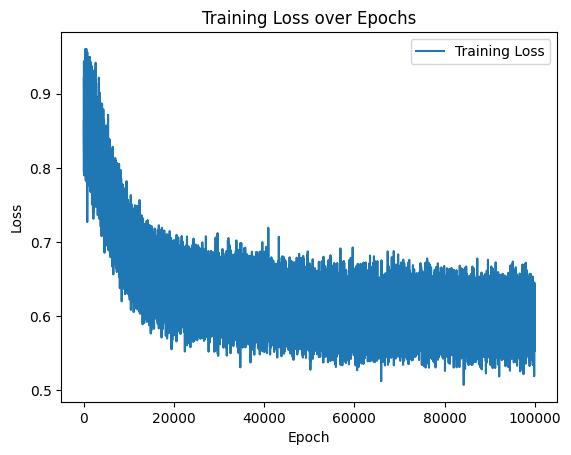

In [ ]:
from re import VERBOSE
import matplotlib.pyplot as plt # plotting figures

def plot_loss(epochs, losses):
    plt.plot(epochs, losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()
    plt.show()

# Define our Logistic Regression model:
class LogisticRegressionModel(object):

    def __init__(self, num_features):
        self.W = tf.Variable(tf.random.normal(shape=[num_features, 1])) # a column vector, initial weights follow the standard normal distribution
        self.b = tf.Variable(tf.random.normal(shape=[1, 1]))  # bias is a single value

    # X are inputs, i.e., a table of features where *each row* contains features for *a data item*
    # return P(X): the likelihood (i.e., probability of being spam) of data
    def __call__(self, X): # instance is called via this method: after e is created, call: e() <-- __call__ method will be called
        return self.likelihood(X)

    # compute the probability that X is a spam:
    def likelihood(self, X):
      raw_Y = tf.matmul(X, self.W) + self.b
      return tf.math.sigmoid(raw_Y)  # 1./(1. + tf.exp(-raw_Y)) is just the sigmoid function

    def predict(self, X):
      p = self.likelihood(X)
      return p

def compute_loss(modelOutput, y_true):
    # Use binary cross-entropy loss for logistic regression
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true, logits=modelOutput))
    return loss


# training:
model = LogisticRegressionModel(num_features)

epochs = range(100000)
batch_size = 100
learning_rate = 0.01

losses = []
accuracies = []  # Initialize an empty list


# Define a training loop:
for i in epochs:
  rand_index = np.random.choice(train_size, size = batch_size) # generate 100 random indices
  X = train_data[rand_index]  # given 100 random indices, choose 100 data points from train_data
  Y = np.transpose([train_labels[rand_index]])  # get their true y values for those 100 data points

  with tf.GradientTape() as tape:
    loss = compute_loss(model(X), Y)  # compute the loss based on the model output and the true Y

  dW, db = tape.gradient(loss, [model.W, model.b])

  model.W.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

  losses.append(loss.numpy())

  if i % 100 == 0:
    print("=> epoch %2d: loss= %.2f" %(i, loss.numpy()))

# training is finished !!

# use testing dataset to see the accuracy of our model:

predicted_values = model.predict(test_data) # predicted labels are probabilities

print("\n The first two predicted values: ", predicted_values[0:2])  # print the first two predicted y values

accuracy = 0

for i in range(test_size):
  if predicted_values[i] >= 0.5:  # if probability >= 0.5, it is a spam
    predicted_y = 1
  else:
    predicted_y = 0

  eq = tf.cast(tf.equal(predicted_y, test_labels[i]), tf.float32)  # eq is 0 if model does not predict correctly, or 1 if correctly

  accuracy = accuracy + eq.numpy()

print("Accuracy:", accuracy/test_size)

plot_loss(epochs, losses)

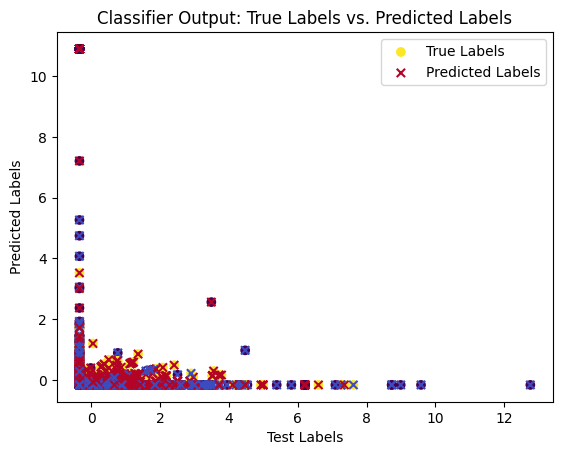

In [ ]:
# Assuming you have predicted values (probabilities) for each test sample
# Convert predicted probabilities to predicted labels using NumPy
predicted_labels = (predicted_values.numpy() >= 0.5).astype(int)

# Create a scatter plot
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap='viridis', label='True Labels')
plt.scatter(test_data[:, 0], test_data[:, 1], c=predicted_labels, cmap='coolwarm', marker='x', label='Predicted Labels')

plt.xlabel('Test Labels')
plt.ylabel('Predicted Labels')
plt.title('Classifier Output: True Labels vs. Predicted Labels')
plt.legend()
plt.show()

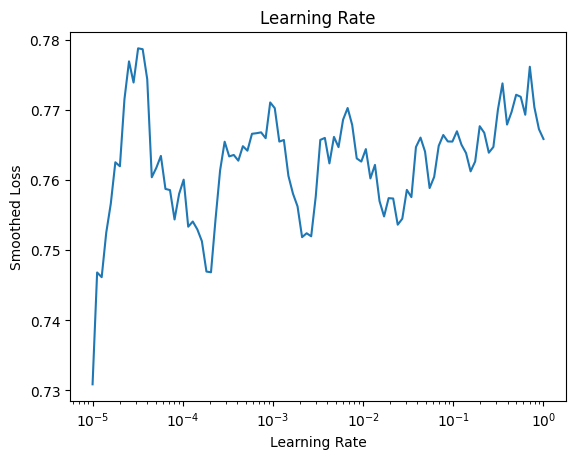

In [ ]:
# Function to find the best learning rate
def find_best_learning_rate(model, X, Y, start_lr, end_lr, num_batches=100, beta=0.9):
    avg_loss = 0.0
    lr_values = np.logspace(start=np.log10(start_lr), stop=np.log10(end_lr), num=num_batches)
    losses = []

    for lr in lr_values:
        optimizer = tf.optimizers.SGD(lr)
        model_copy = LogisticRegressionModel(num_features)

        for i in range(num_batches):
            rand_indices = np.random.choice(train_size, size=batch_size)
            X_batch = train_data[rand_indices]
            Y_batch = np.transpose([train_labels[rand_indices]])

            with tf.GradientTape() as tape:
                loss = compute_loss(model_copy(X_batch), Y_batch)

            gradients = tape.gradient(loss, [model_copy.W, model_copy.b])
            optimizer.apply_gradients(zip(gradients, [model_copy.W, model_copy.b]))

            avg_loss = beta * avg_loss + (1 - beta) * loss.numpy()
            losses.append(avg_loss / (1 - beta ** (i + 1)))

    return lr_values, losses

# Find the best learning rate
start_lr = 1e-5
end_lr = 1
lr_values, losses = find_best_learning_rate(model, train_data, train_labels, start_lr, end_lr)

# Plot the learning rate finder curve
plt.plot(lr_values, losses[:len(lr_values)])
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Smoothed Loss')
plt.title('Learning Rate')
plt.show()

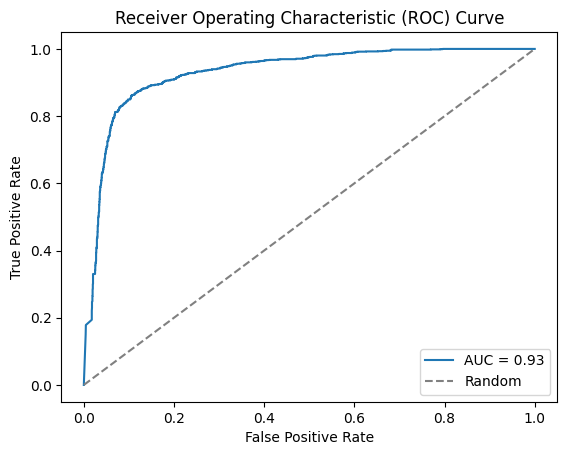

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(test_labels, predicted_values)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

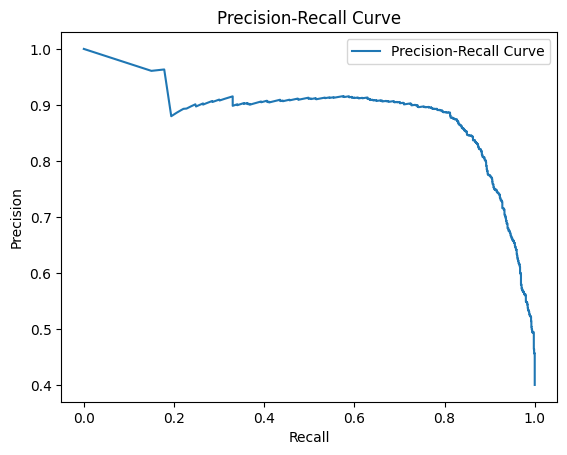

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(test_labels, predicted_values)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()